<a href="https://colab.research.google.com/github/Zachflah/ASG-2/blob/master/ControlSystemsProject_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to Project Part 2! Please review Part 1 for instructions about how to use Google Colab.

In [1]:
!pip install control
!pip install slycot

     |████████████████████████████████| 348kB 12.4MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344920 sha256=bd602f86f752396bdaf92d3d7d1bdec38bb0cf496fd3024c88608e0dcc00b019
  Stored in directory: /root/.cache/pip/wheels/35/be/ee/081b68ca3e4b2d253fba2f7f7e51960373903fb7b6d13c5532
Successfully built control
     |████████████████████████████████| 1.6MB 11.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for slycot: filename=slycot-0.4.0-cp37-cp37m-linux_x86_64.whl size=1417829 sha256=049362893d37bb27c4a4b602489c847ce3a2590c475642ad524dac6fb7a7aaf9
  Stored in directory: /root/.cache/pip/wheels/a2/46/56/f82cbb2fd06556f4f3952a2eb2396e8fd29264fffecbaad3cf
Successfully built slycot


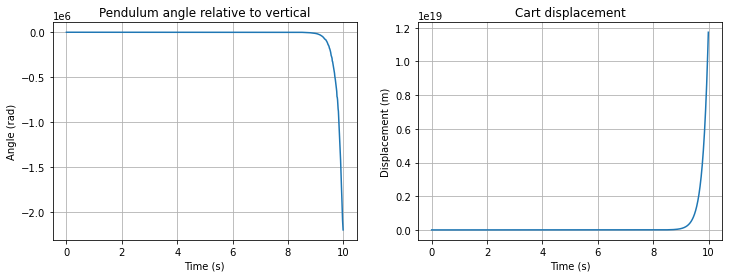

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as control
import matplotlib.animation as animation
from math import sin, cos, pi
from matplotlib import rc
from IPython.display import HTML, Image

# Uncomment and set the controller gains here when you get to Activity 5.
Kp = 10
Ki = 10
Kd = 10

# Define the transfer functions for the linearized system. We have two transfer
# functions for this system (Gpend(s) and Gcart(s)). Define them here by listing
# the coefficients of the numerator and denominator polynomials. For example, if
# the numerator polynomial is 1.1*s^3 + 2.2*s^2 - 4.4, then the coefficient list
# is [1.1, 2.2, 0, -4.4].

#comment this section if you wish to get the graphs for activity 5
#Gpend_numer = [1,0,0]
#Gpend_denom = [0.22,0.8,-6.87,-19.62,0]
#Gcart_numer = [0.4,0,-9.8]
#Gcart_denom = [0.22,0.8,-6.87,-19.62]

#comment this section if you wish to get the graphs for activity 2
Gpend_numer = [1,0,0]
Gpend_denom = [0.22,0.8+Kd,Kp-6.87,Ki-19.62,0]
Gcart_numer = [0.4,0,-9.8,0]
Gcart_denom = [0.22,0.8+0.4*Kd,0.4*Kp-6.87,0.4*Ki-19.62-9.81*Kd,-9.81*Kp,-9.81*Ki]

# Simulate the impulse response of the system.
G = control.tf([[Gpend_numer],[Gcart_numer]], [[Gpend_denom],[Gcart_denom]])
t_input = np.arange(0.0, 10.0, 0.01)
y,t = control.impulse(G, t_input)
phi = [row[0] for row in y]
x = [row[1] for row in y]

# Plot the response of the pendulum and cart.
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Pendulum angle relative to vertical')
plt.grid()
plt.plot(t,phi)
plt.ylabel('Angle (rad)')
plt.xlabel('Time (s)')

plt.subplot(1,2,2)
plt.title('Cart displacement')
plt.grid()
plt.plot(t,x)
plt.ylabel('Displacement (m)')
plt.xlabel('Time (s)')
plt.show()

# Generate an animation (this may take a few seconds to run). You can disable
# the animation by commenting out the last line ("genAnimation") in this block.
fig = plt.figure(figsize=(8, 6.4))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-5, 5), ylim=(-0.5, 3))
ax.get_yaxis().set_visible(True)
ax.set_aspect('equal')
ax.grid()
block, = ax.plot([], [], linestyle='None', marker='s', markersize=40,
                 markeredgecolor='k', markeredgewidth=2, color='blue')
line1, = ax.plot([], [], 'o-', lw=4, markersize=6, color='orange',
                 markeredgecolor='k', markerfacecolor='k')
line2, = ax.plot([], [], 'k-', lw=4)
time_text = ''
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
cart_width = 0.8
cart_height = 0.8
L = 0.3
scale = 2.0

def init():
  block.set_data([], [])
  line1.set_data([], [])
  line2.set_data([], [])
  time_text.set_text('')
  return time_text, line1, line2, block

def animate(i):
  line1.set_data([x[i], x[i] + (L*2.0*scale)*sin(phi[i])],
                 [0.5, (cart_height*0.5) + (L*2.0*scale)*(cos(phi[i]))])
  line2.set_data([-5, 5], [-cart_width*0.5, -cart_width*0.5])
  block.set_data([x[i]], [0])
  time_text.set_text('Time = ' + str(round(t[i], 1)) + ' s')
  return time_text, line1, line2, block

genAnimation = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
                                       interval=25, blit=True, init_func=init)
plt.close()
rc('animation', html='jshtml')    # For compatibility with Google Colab
#genAnimation
